In [16]:
from google.colab import files
uploaded = files.upload()


Saving salary_dataset_with_spaces.csv to salary_dataset_with_spaces.csv


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
df = pd.read_csv("salary_data.csv")
df.head()


,YearsExperience,EducationLevel,City,JobTitle,Salary
0,1,Bachelors,New York,Data Analyst,60000
1,2,Bachelors,San Francisco,Web Developer,75000
2,3,Masters,New York,Data Scientist,90000
3,4,Masters,Austin,Data Scientist,110000
4,5,Masters,Austin,ML Engineer,115000


In [19]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   YearsExperience  10 non-null     int64 
 1   EducationLevel   10 non-null     object
 2   City             10 non-null     object
 3   JobTitle         10 non-null     object
 4   Salary           10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


,0
YearsExperience,0
EducationLevel,0
City,0
JobTitle,0
Salary,0


In [21]:
le = LabelEncoder()
for col in ['JobTitle', 'EducationLevel', 'City']:
    df[col] = le.fit_transform(df[col])

In [22]:
X = df.drop('Salary', axis=1)
y = df['Salary']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [25]:
voting = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('ada', ada)])
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42)),
                            ('ada', AdaBoostRegressor(random_state=42))])

In [26]:
models = {'Random Forest': rf, 'Gradient Boosting': gb, 'AdaBoost': ada, 'Voting Regressor': voting}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"{name} => R2 Score: {r2_score(y_test, preds):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")

Random Forest => R2 Score: -13.2746, RMSE: 37781.77
Gradient Boosting => R2 Score: -14.1844, RMSE: 38967.15
AdaBoost => R2 Score: -15.2500, RMSE: 40311.29
Voting Regressor => R2 Score: -13.9405, RMSE: 38652.90


In [27]:
import joblib
joblib.dump(voting, 'salary_predictor_model.pkl')



['salary_predictor_model.pkl']

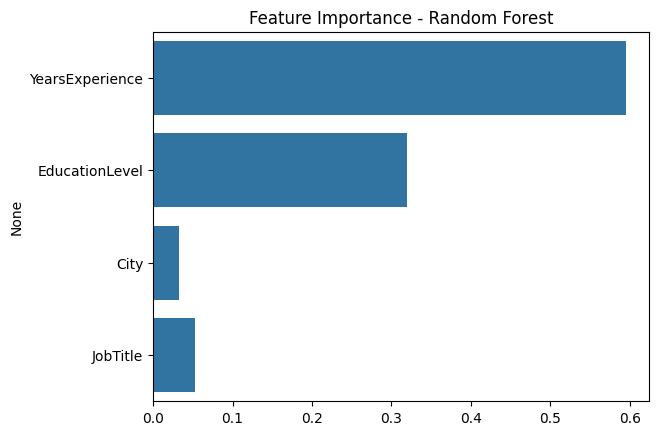

In [28]:
importances = rf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()